<a href="https://colab.research.google.com/github/meethariprasad/phd/blob/master/Siamese_TF_Cosine_Distance_Fine_Tune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
# !pip install tensorflow==2.1.0rc0
import tensorflow as tf
print (tf.__version__)

TensorFlow 2.x selected.
2.1.0-rc1


In [74]:
x=np.asarray([-1.,-1.,-1],dtype=float)
x=np.reshape(x,(1,3))
y=np.asarray([1.,1.,1.],dtype=float)
y=np.reshape(x,(1,3))
tf.keras.layers.Dot(axes=-1,normalize=True)([x,y]).numpy()[0][0]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



0.99999994

2.1.0-rc1
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        (None, 512)          256797824   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dot (Dot)                       (None, 1)            0           keras_layer[0][0]  

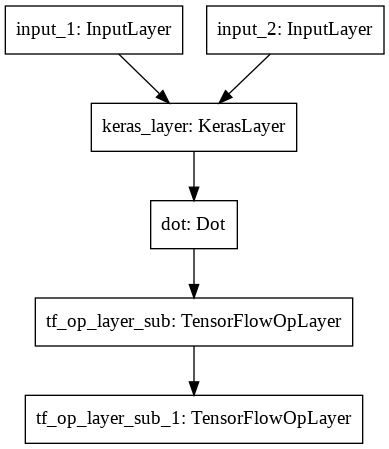

In [21]:
# !pip install tensorflow==2.1.0rc0
import tensorflow as tf
print (tf.__version__)
tf.keras.backend.clear_session()
import tensorflow_hub as hub
from tensorflow import keras
huburl="https://tfhub.dev/google/universal-sentence-encoder/4"
loaded_module_obj = hub.load(huburl)
shared_embedding_layer = hub.KerasLayer(loaded_module_obj,trainable=True)

left_input = keras.Input(shape=(), dtype=tf.string)
right_input = keras.Input(shape=(), dtype=tf.string)

embedding_left_output= shared_embedding_layer(left_input)
embedding_right_output= shared_embedding_layer(right_input)

cosine_similiarity=1-tf.keras.layers.Dot(axes=-1,normalize=True)([embedding_left_output,embedding_right_output])
cos_distance=1-cosine_similiarity

model = tf.keras.Model([left_input,right_input], cos_distance)
model.compile('sgd', loss='mse')
model.summary()
tf.keras.utils.plot_model(model, to_file='my_model.png')

In [47]:
import numpy as np
text_list=["Man is going to Moon","Man is from Monkeys"]
left_inputs=np.asarray([text_list[0]])
right_inputs=np.asarray([text_list[1]])
#Distance Varies between 0-1
similiarity=np.asarray([1])
from keras.callbacks import Callback


class stopAtLossValue(Callback):
  import numpy as np
  def on_batch_end(self, batch, logs={}):
    THR = 0 #Assign THR with the value at which you want to stop training.
    if np.round(logs.get('loss')) == THR:
      self.model.stop_training = True

import numpy as np

model.fit([left_inputs,right_inputs],similiarity,epochs=10,callbacks=[stopAtLossValue()])

Train on 1 samples
Epoch 1/10
1/1 [==============================] - 0s 16ms/sample - loss: 0.0228


In [15]:
import tensorflow_hub as hub
import tensorflow as tf
print (text_list)

embeddings = loaded_module_obj(text_list)

# print (embeddings.numpy())

embed_target=embeddings.numpy()
import pandas as pd
doc_embed = pd.DataFrame(data=embed_target)
doc_embed.index=text_list

def get_similiarity(target_text_embed,text_to_compare_embed):
    from sklearn.metrics.pairwise import cosine_similarity
    similiarity=cosine_similarity(target_text_embed,text_to_compare_embed)
    similiarity=pd.DataFrame(similiarity)
    return similiarity



sim_a=get_similiarity(doc_embed,doc_embed)
# np.fill_diagonal(sim.values, 0)
sim_a.index=text_list
sim_a.columns=text_list
sim_a

########################################
import tensorflow_hub as hub
import tensorflow as tf
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

embeddings = embed(text_list)

print (embeddings.numpy())

embed_target=embeddings.numpy()
import pandas as pd
doc_embed_global = pd.DataFrame(data=embed_target)
doc_embed_global.index=text_list
########################################
sim_b=get_similiarity(doc_embed_global,doc_embed_global)
# np.fill_diagonal(sim.values, 0)
sim_b.index=text_list
sim_b.columns=text_list

['Man is going to Moon', 'America is a great country']
[[ 0.02499899 -0.06669243 -0.05308516 ... -0.06679832  0.05328914
  -0.00140529]
 [-0.0709133  -0.08267237 -0.02458058 ... -0.05879002  0.02511639
  -0.00632257]]
[[ 0.04370566 -0.05917678 -0.05763391 ... -0.0527393   0.06156207
  -0.00462211]
 [-0.07377901 -0.08619046 -0.01028674 ... -0.04194556  0.0149134
  -0.01307742]]


In [75]:
print ("With Fine Tune")
sim_a

With Fine Tune


With Fine Tune                           
                           Man is going to Moon America is a great country
Man is going to Moon                   1.000000                   0.370798
America is a great country             0.370798                   1.000000

In [76]:
print ("Without Fine Tune")
sim_b

Without Fine Tune


Without Fine Tune                           
                           Man is going to Moon America is a great country
Man is going to Moon                   1.000000                   0.059207
America is a great country             0.059207                   1.000000

In [0]:
# import os
# os.makedirs('finetuned_model_export',exist_ok=True)
# export_module_dir = os.path.join(os.getcwd(), "finetuned_model_export")
# tf.saved_model.save(loaded_module_obj, export_module_dir)